# Dimerization
***
This file contains a simple example to demonstrate the use of GillesPy2 to
perform a stochastic simulation.  The example is biologically-motivated;
however, in terms of biology, it is overly simplistic and does not capture
the real-life complexity of the process being modeled -- the aim is not
biological realism but rather to illustrate basic usage of GillesPy2.

Some molecules can self-associate to form structures known as dimers.
"Dimerization" is a process in which two molecules of some molecular
species (known as a "monomer" in this situation -- let's call it "M" for
short) come together to create a new molecule (call it "D"), but do so in a
way that is reversible, meaning the combined structure can also decay or
dissociate back into "M". (More information about dimerization can be found
in the online book "Molecular Biology of the Cell", 4th edition, at the
site https://www.ncbi.nlm.nih.gov/books/NBK26830/.)  A simple model of the
dimerization process represents it as two reactions: a reaction in which
one molecule of "M" reacts reversibly with another molecule of "M" to form
one new molecule (call it "D"), and another reaction in which a molecule of
"D" breaks apart into two molecules of "M".  Each of these two reactions has
its own rate.  In terms of biochemical reactions, it looks like this:

<center>       kc     </center>
<center>2 M  <---->  D</center>
<center>       kd     </center>

where kc and kd represent the rate constants for creation and dissociation
of the dimer, respectively.
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../..')))

MatPlotLib is used for creating custom visualizations

In [2]:
import matplotlib.pyplot as plt

In [3]:
import gillespy2

***
## Build the Dimerization Model
***
In GillesPy2, a model to be simulated is expressed as an object having the
parent class "Model".  Components of the model to be simulated, such as the
reactions, molecular species, and the time span for simulation, are all
defined within the class definition.

In [4]:
def build_dimerization(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="Dimerization")

    # Define Variables (GillesPy2.Species)
    m = gillespy2.Species(name='monomer', initial_value=30)
    d = gillespy2.Species(name='dimer', initial_value=0)
    
    # Add Variables to Model
    model.add_species([m, d])

    # Define Parameters
    k_c = gillespy2.Parameter(name='k_c', expression=0.005)
    k_d = gillespy2.Parameter(name='k_d', expression=0.08)
    
    # Add Parameters to Model
    model.add_parameter([k_c, k_d])

    # Define Reactions
    r_creation = gillespy2.Reaction(
        name="r_creation", reactants={'monomer': 2}, products={'dimer': 1}, rate='k_c'
    )
    r_dissociation = gillespy2.Reaction(
        name="r_dissociation", reactants={'dimer': 1}, products={'monomer': 2}, rate='k_d'
    )
    
    # Add Reactions to Model
    model.add_reaction([r_creation, r_dissociation])

    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=101)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [5]:
model = build_dimerization()

***
## Run the Simulations
***
A simulation in GillesPy2 is performed by first instantiating the model to
be simulated, and then invoking the "run" method on that object.  The
results of the simulation are the output of "run".

In this example, we will run the simulation 10 times, by passing the argument
`number_of_trajectories` to the `model.run()` method.

In [6]:
results = model.run(number_of_trajectories=10)

***
## Visualizations
***
The format of the results from a model run is an array of values for different time points.  There will be one subarray for each trajectory. Here, we plot each of the 10 trajectories in the same figure.

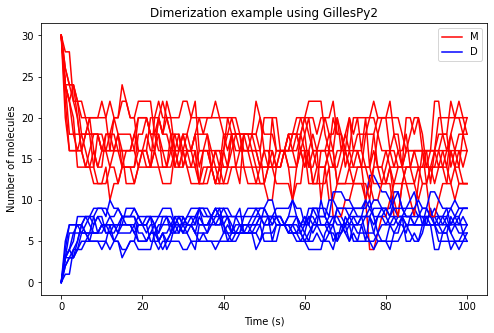

In [7]:
plt.figure(figsize=(8, 5))

for index in range(0, 10):
    trajectory = results[index]
    plt.plot(trajectory['time'], trajectory['monomer'], 'r')
    plt.plot(trajectory['time'], trajectory['dimer'],   'b')

# Do some additional setting up of the plot, and finally show it.

plt.legend(['M', 'D'], loc='best')
plt.xlabel("Time (s)")
plt.ylabel("Number of molecules")
plt.title("Dimerization example using GillesPy2")

plt.show()

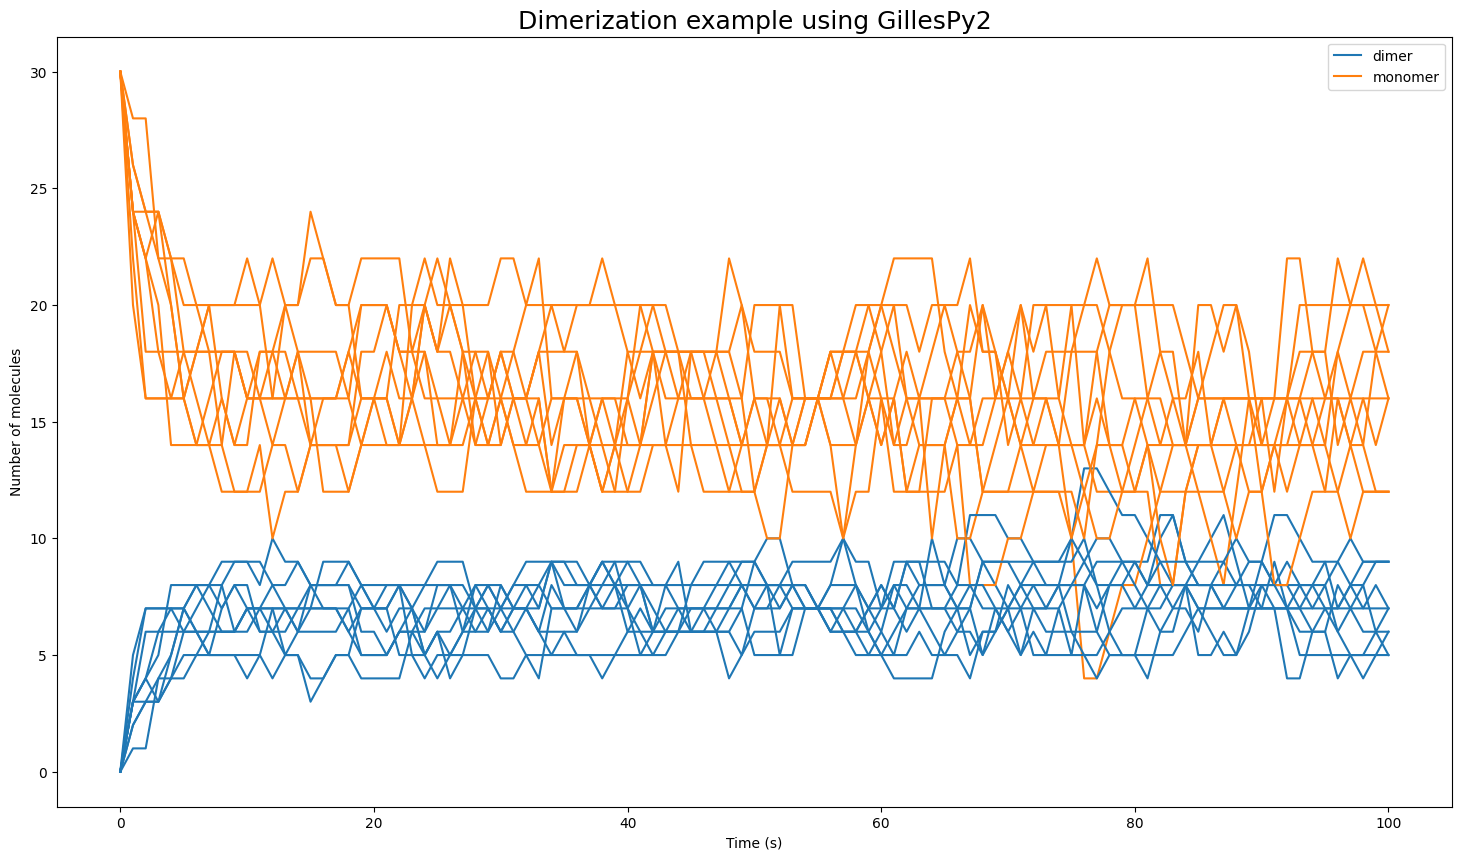

In [8]:
results.plot(
    title="Dimerization example using GillesPy2",
    yaxis_label="Number of molecules",
    xaxis_label="Time (s)"
)